<h2>Part 1: data loading and exploration</h2>

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
data = pd.read_csv('housing.csv')

In [292]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Here we can immediately notice that the ocean_proximity feature will need some pre-processing as it is text-based. Other features will need scaling.

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that the total_bedrooms feature has around 200 null entries. Since they are not too many, we can drop them. The following cell does exactly that: it drops the nand values and saves the result in the data object again.

In [294]:
data.dropna(inplace=True)

If we run data.info() again, we can see how now all features have the same amount of non-null values.

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


We are now going to split the data into training and testing data. This is because we want to have some unseen data to see if the model performs well on this data too. We have results for all the values, but the model doesn't.

In [296]:
from sklearn.model_selection import train_test_split

# X is the data frame without the target variables
X = data.drop(['median_house_value'], axis=1)
# y is the target column, in this case median_house_value
y = data['median_house_value']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

As a result, 20% of the data is not going to be used for anything (training, hyperparameter tuning) until we are confident that we can launch the model.

Now we wanto to join the X and Y training data to analyze some basic correlations.

In [298]:
train_data = X_train.join(y_train)

train_data now contains the combined dataframe, but only for the taining data.

In [299]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3185,-119.79,36.30,16.0,1717.0,277.0,903.0,289.0,4.3438,INLAND,93100.0
10995,-117.82,33.73,27.0,1270.0,258.0,809.0,264.0,5.0162,<1H OCEAN,223000.0
18623,-122.03,37.05,12.0,2010.0,422.0,784.0,407.0,3.9728,NEAR OCEAN,190900.0
14121,-117.10,32.74,20.0,3854.0,1046.0,3555.0,966.0,1.6747,NEAR OCEAN,100000.0
15017,-117.05,32.78,37.0,1184.0,178.0,529.0,192.0,4.7941,<1H OCEAN,161700.0
...,...,...,...,...,...,...,...,...,...,...
15476,-117.17,33.18,25.0,596.0,115.0,426.0,137.0,3.0221,<1H OCEAN,214300.0
3961,-118.56,34.20,35.0,1770.0,362.0,1083.0,355.0,5.0483,<1H OCEAN,221000.0
6768,-118.14,34.11,52.0,3367.0,545.0,1427.0,535.0,5.2292,<1H OCEAN,444500.0
4660,-118.31,34.05,40.0,1667.0,365.0,1161.0,384.0,3.1406,<1H OCEAN,417600.0


We can now do some basic numeric exploration (thus ocean_proximity is not going to be considered for now).

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

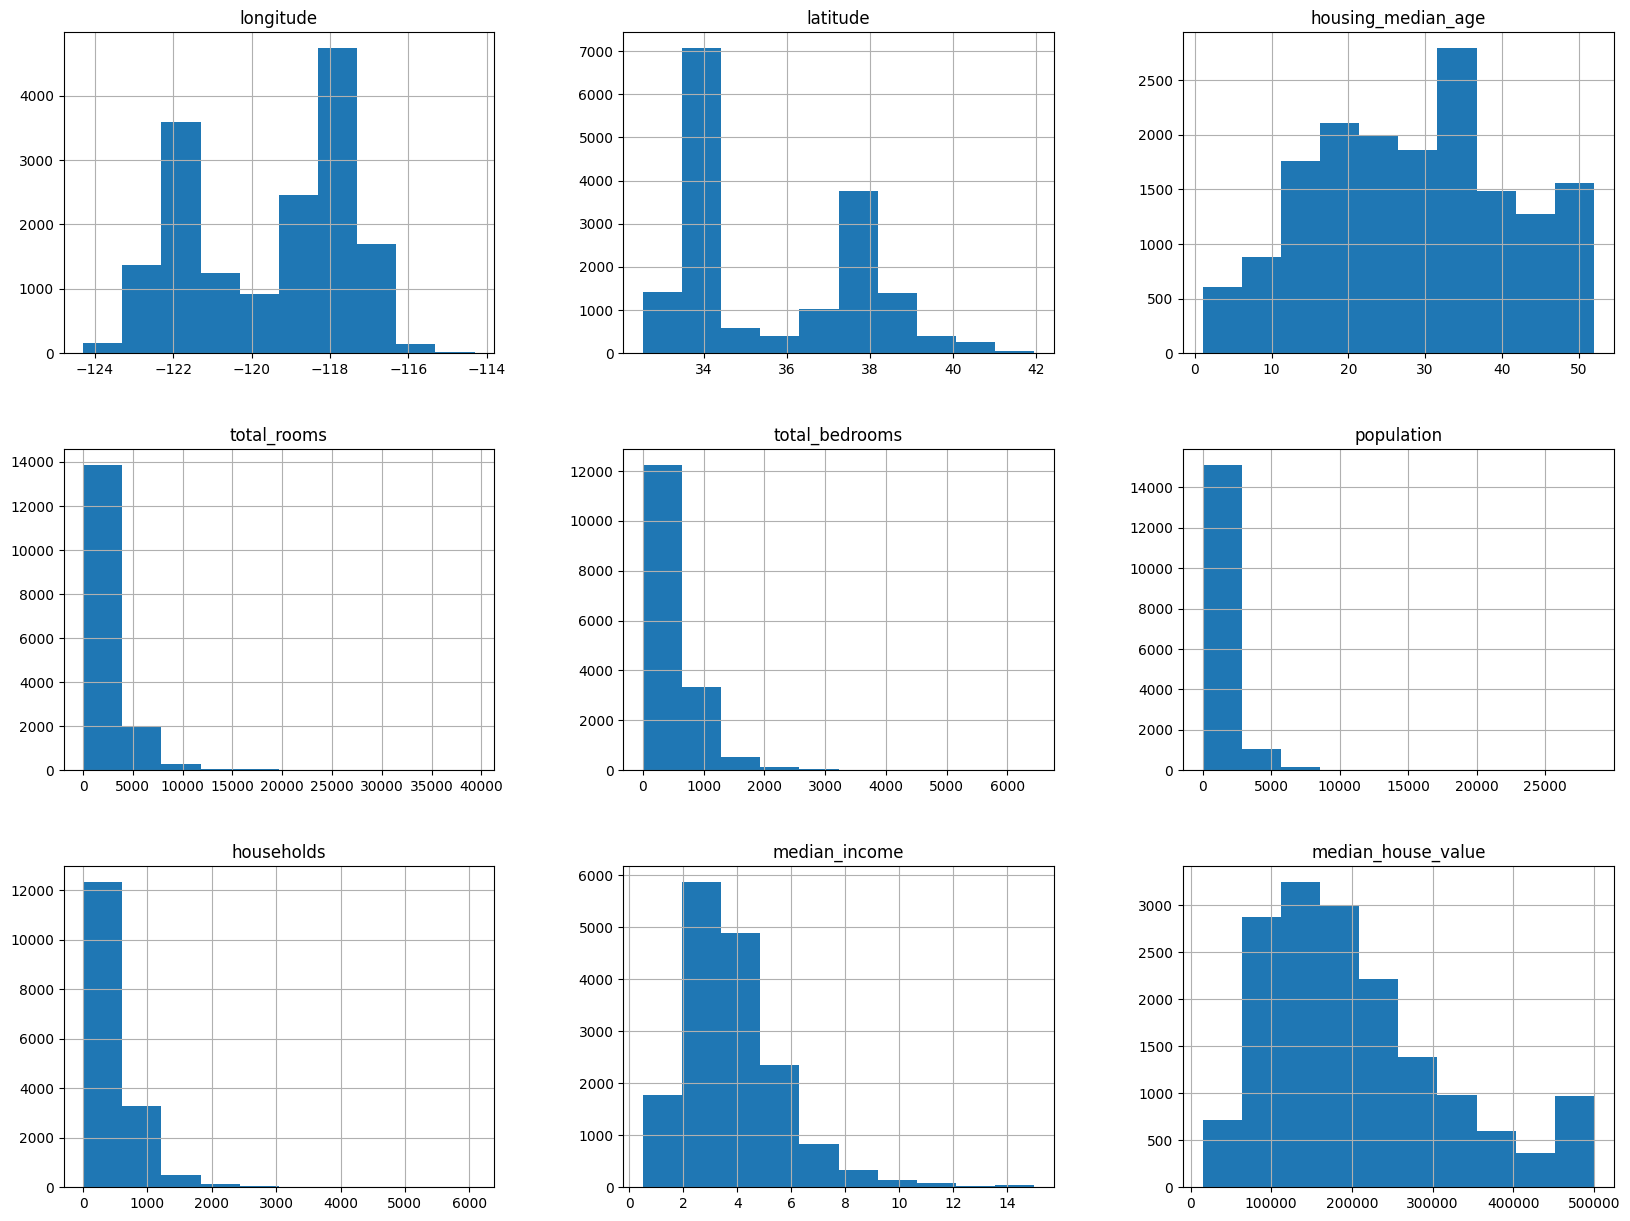

In [300]:
train_data.hist(figsize=(20, 15))

The .corr() function produces a correlation matrix. To visualize the correlation matrix we can use seaborn's heatmap.

In [301]:
numerical_train_data = train_data.select_dtypes(include=[np.number])
numerical_train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924440,-0.113285,0.044263,0.069291,0.099784,0.054995,-0.014873,-0.045891
latitude,-0.924440,1.000000,0.014098,-0.034376,-0.065723,-0.108224,-0.069488,-0.080458,-0.144946
housing_median_age,-0.113285,0.014098,1.000000,-0.357441,-0.317104,-0.297300,-0.299306,-0.119924,0.106404
total_rooms,0.044263,-0.034376,-0.357441,1.000000,0.929399,0.862997,0.917972,0.201819,0.136467
total_bedrooms,0.069291,-0.065723,-0.317104,0.929399,1.000000,0.883401,0.979249,-0.004200,0.051950
population,0.099784,-0.108224,-0.297300,0.862997,0.883401,1.000000,0.913508,0.009409,-0.022157
households,0.054995,-0.069488,-0.299306,0.917972,0.979249,0.913508,1.000000,0.017170,0.067175
median_income,-0.014873,-0.080458,-0.119924,0.201819,-0.004200,0.009409,0.017170,1.000000,0.687258
median_house_value,-0.045891,-0.144946,0.106404,0.136467,0.051950,-0.022157,0.067175,0.687258,1.000000


<Axes: >

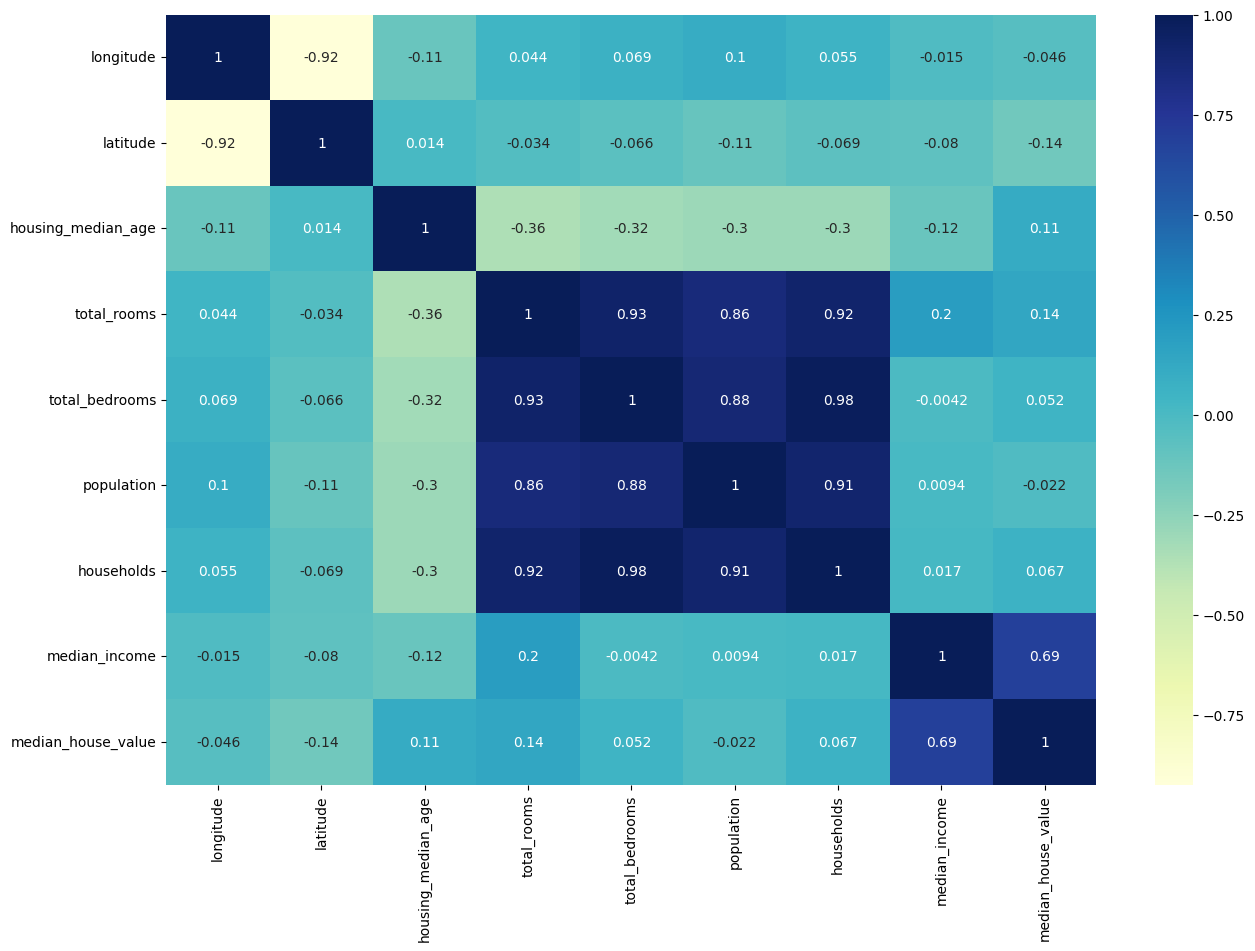

In [302]:
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_train_data.corr(), annot=True, cmap='YlGnBu')

What interests us, is the correlation of the features to the median_hous_value, which is our target feature. For instance, we can see that the median_income of a block correlates quite strongly with the median_house_value, which tells us it can be a great predictor. 

<h2>Part 2: data preprocessing</h2>

From the histograms, we can see how some features are quite skewed. For these features, we are going to take the logarithm to see what the distribution looks like.

In [303]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

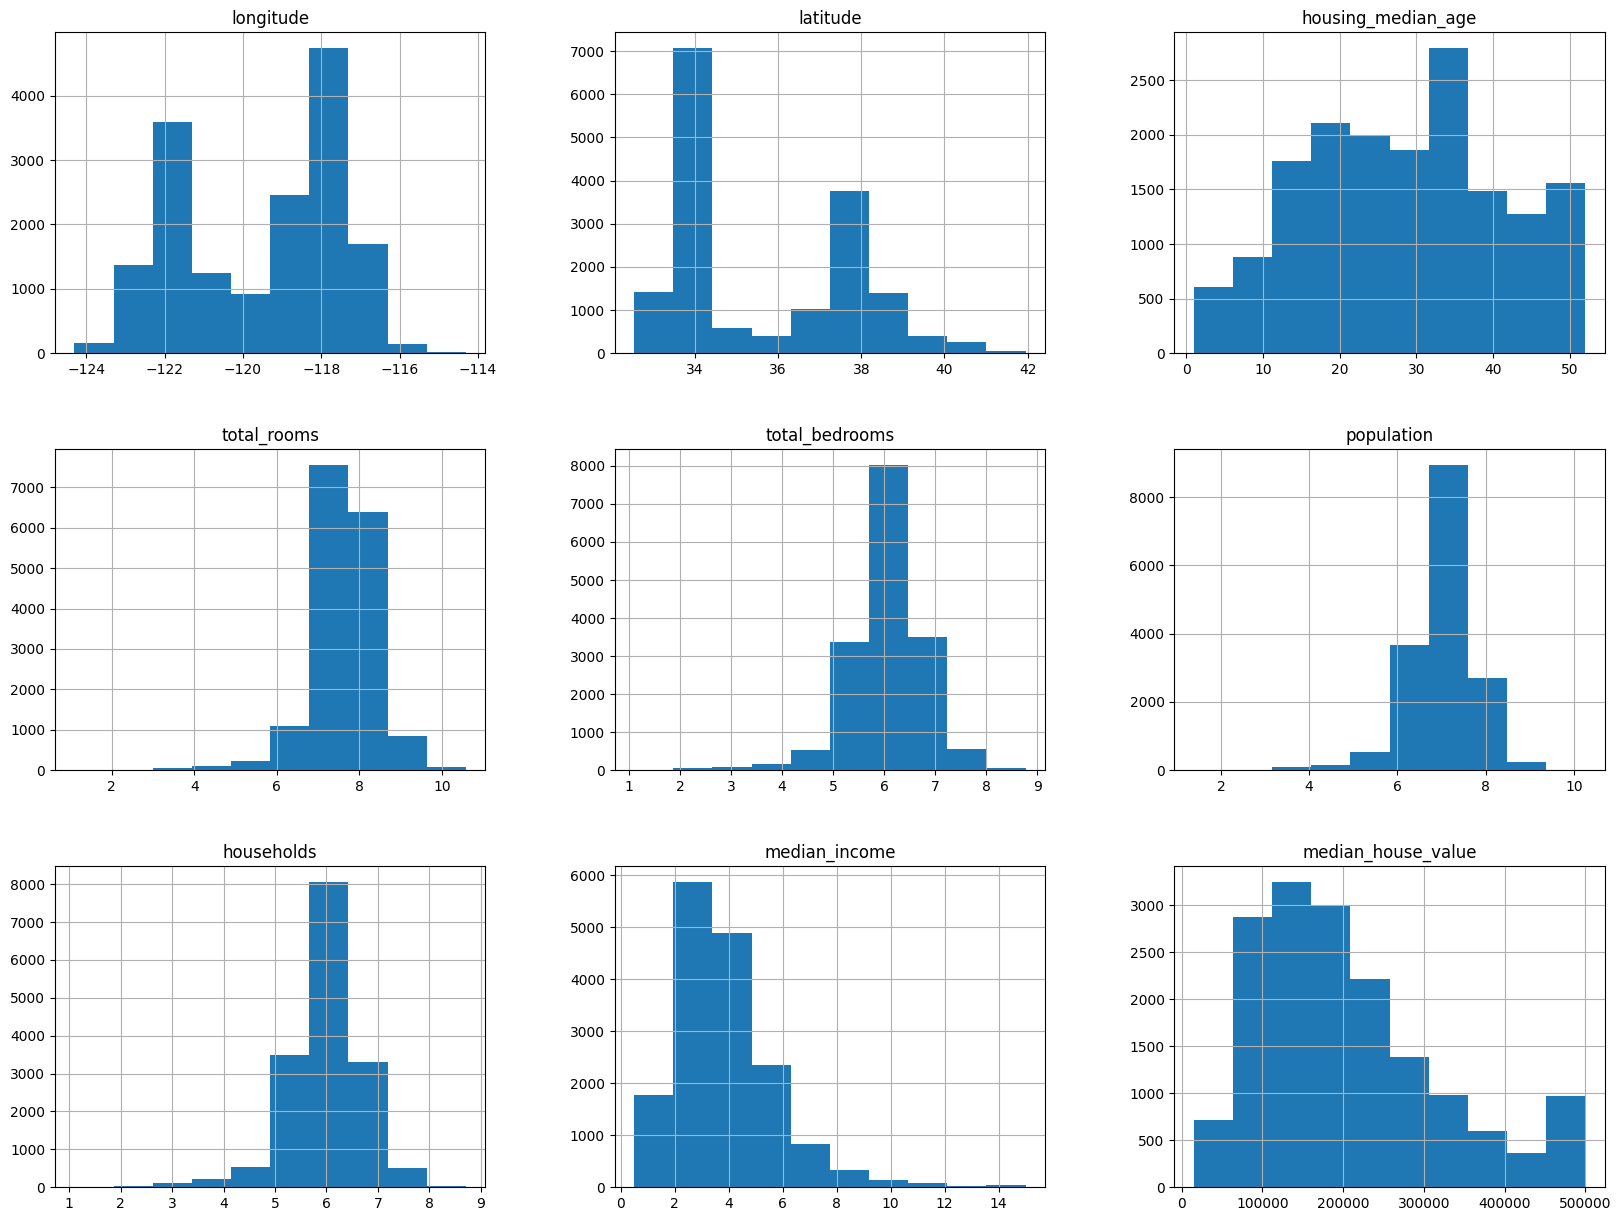

In [304]:
train_data.hist(figsize=(20, 15))

Now we need to take care of the ocean_proximity features.

In [305]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7162
INLAND        5252
NEAR OCEAN    2109
NEAR BAY      1820
ISLAND           3
Name: count, dtype: int64

Instead of just assigning numerical values to each category, we are going to create a binary feature for each of them.

In [306]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [307]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3185,-119.79,36.30,16.0,7.448916,5.627621,6.806829,5.669881,4.3438,93100.0,False,True,False,False,False
10995,-117.82,33.73,27.0,7.147559,5.556828,6.697034,5.579730,5.0162,223000.0,True,False,False,False,False
18623,-122.03,37.05,12.0,7.606387,6.047372,6.665684,6.011267,3.9728,190900.0,False,False,False,False,True
14121,-117.10,32.74,20.0,8.257126,6.953684,8.176392,6.874198,1.6747,100000.0,False,False,False,False,True
15017,-117.05,32.78,37.0,7.077498,5.187386,6.272877,5.262690,4.7941,161700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15476,-117.17,33.18,25.0,6.391917,4.753590,6.056784,4.927254,3.0221,214300.0,True,False,False,False,False
3961,-118.56,34.20,35.0,7.479300,5.894403,6.988413,5.874931,5.0483,221000.0,True,False,False,False,False
6768,-118.14,34.11,52.0,8.122074,6.302619,7.264030,6.284134,5.2292,444500.0,True,False,False,False,False
4660,-118.31,34.05,40.0,7.419381,5.902633,7.057898,5.953243,3.1406,417600.0,True,False,False,False,False


We can now recreate the heatmap to see how these new features correlate with out target feature.

<Axes: >

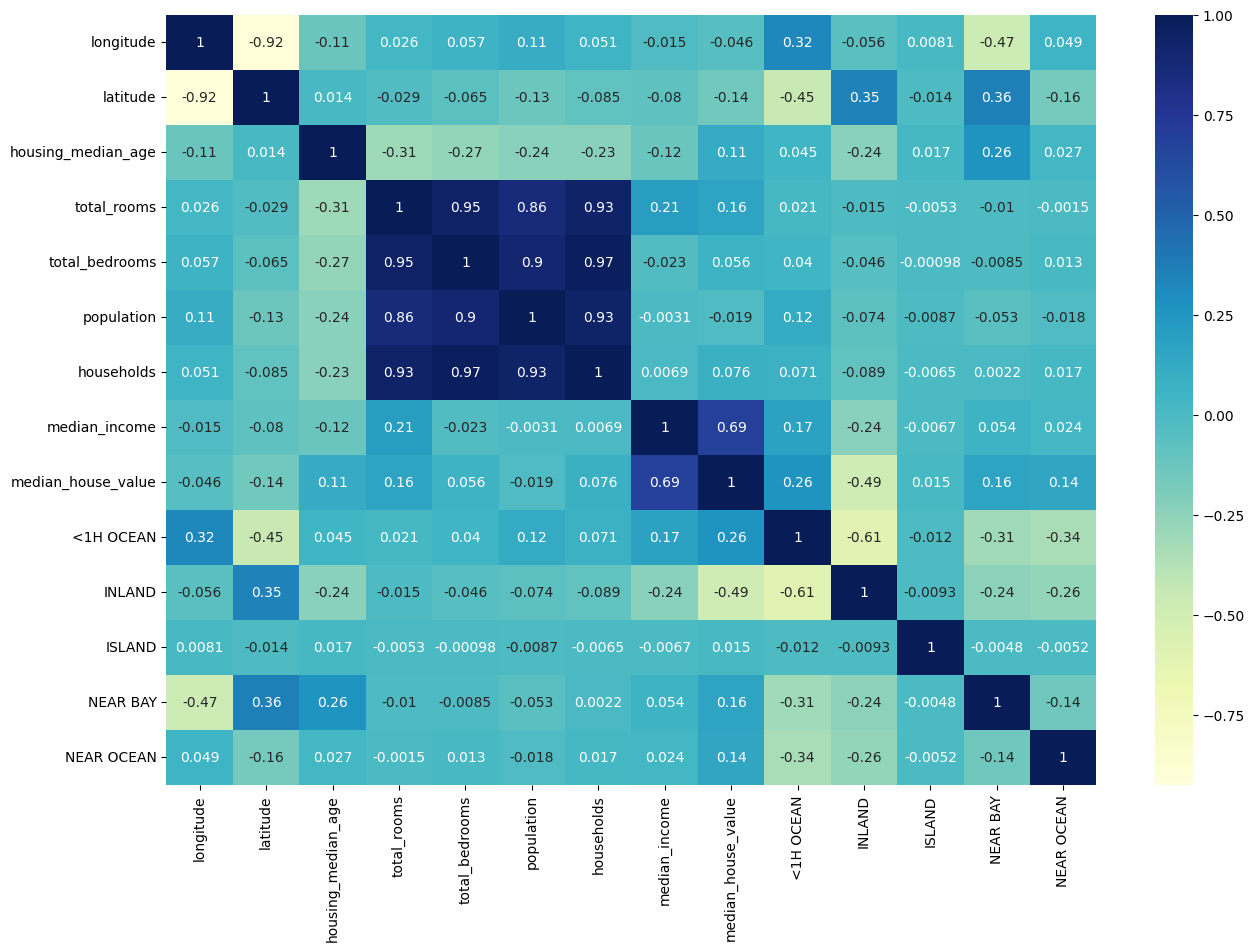

In [308]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

For instance, we can see that there is a negative correlation with inland: if you are inland, the median price in the block is way lower than if you are not inland. The opposite is true for houses less than an hour away from the ocean.

<Axes: xlabel='latitude', ylabel='longitude'>

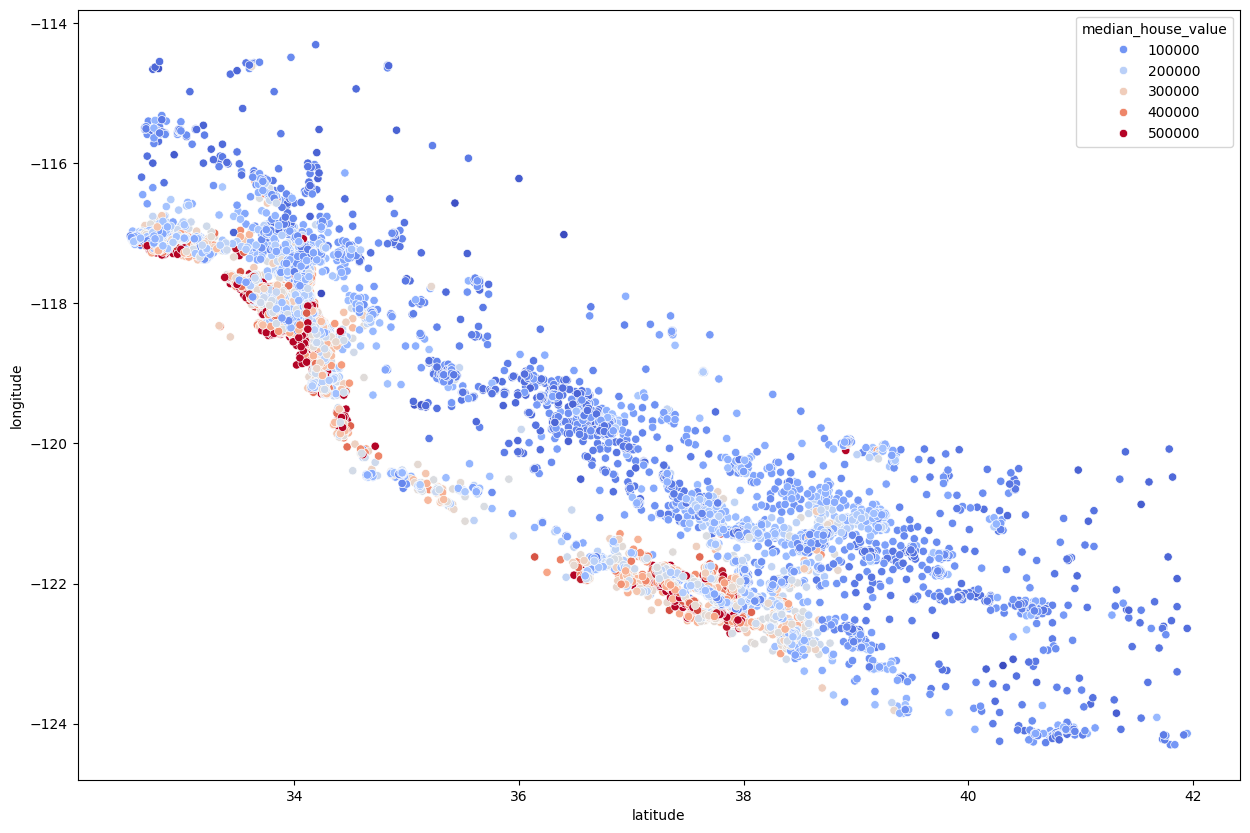

In [309]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<h2>Part 3: feature engineering</h2>

We can combine existing fetures to create new features that are even more interesting. For instance, we can be interested in seeing how many of the rooms in a house are bedrooms. Also, if we have a block with more households than usual we will probably have more rooms as well, so the rooms by themselves do not necessarily give us the full picture. Therefore, we can create a new feature showing the ratio of rooms to households.

In [310]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

<Axes: >

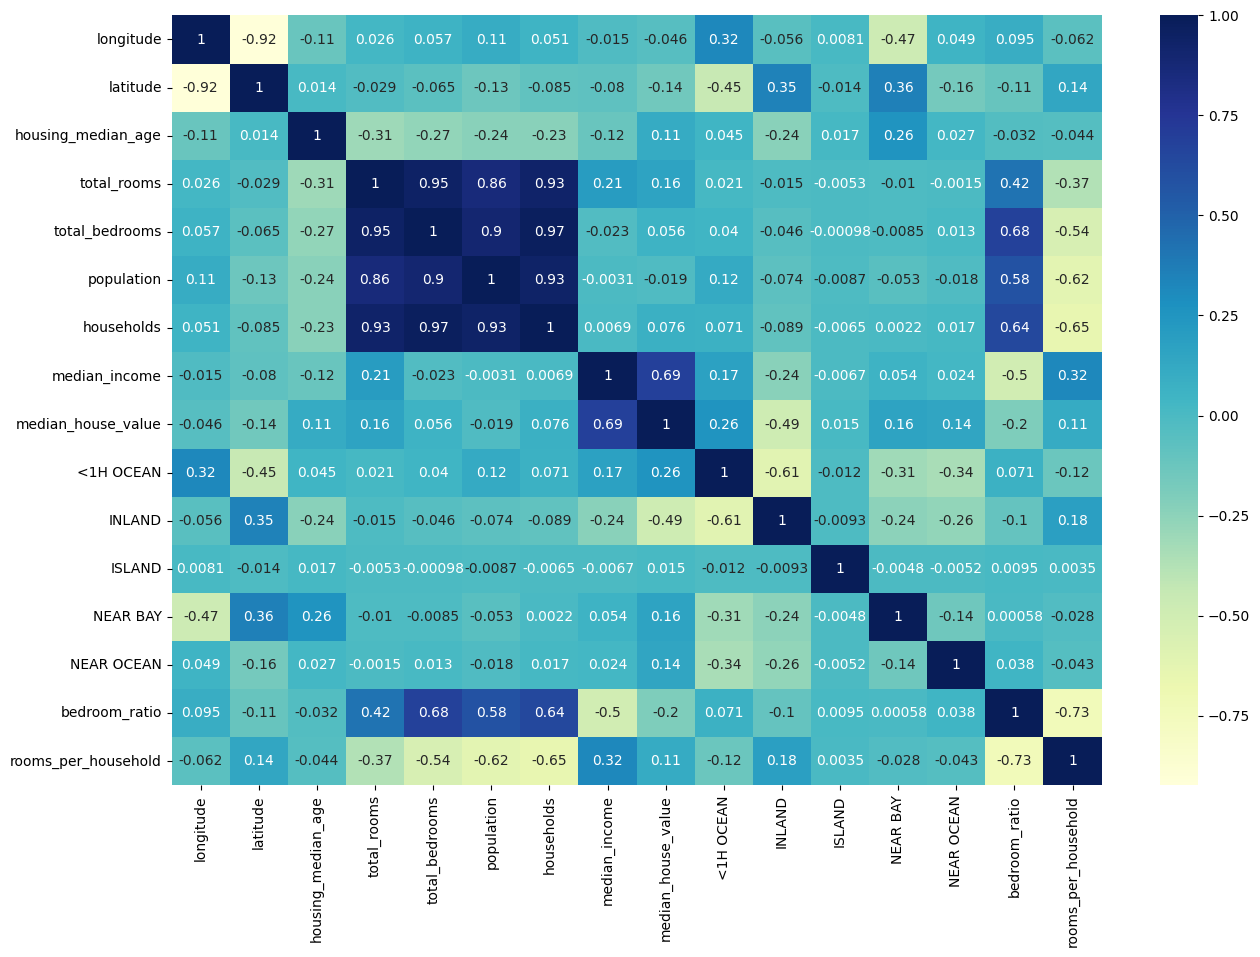

In [311]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

As we can see, the bedroom_ratio has a negative correlation with the target feature. The bedrooms feature, instead, is less informative. The same applies to the households feature, which by itself is not very interesting as a input variable, having only a 0.07 correlation to the target variable. The rooms_per_household feature, however, is more interesting.

<h2>Part 4: Linear regression model</h2>

In [312]:
from sklearn.linear_model import LinearRegression

# We have to do split the data into x and y again
X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [313]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']

In [314]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [315]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
15874,-122.40,37.75,52.0,7.075809,5.730100,6.937314,5.726848,2.0577,214600.0,False,False,False,True,False,0.809816,1.235550
9422,-122.66,37.93,42.0,7.317212,5.783825,6.317165,5.627621,4.1792,350000.0,False,False,False,False,True,0.790441,1.300232
77,-122.28,37.81,19.0,7.096721,5.497168,6.582025,5.337538,1.1111,108300.0,False,False,False,True,False,0.774607,1.329587
12693,-121.41,38.57,16.0,8.396155,7.025538,7.338888,6.867974,3.2443,190700.0,False,True,False,False,False,0.836757,1.222508
7024,-118.11,33.97,33.0,7.661998,6.216606,7.422374,6.167516,3.6397,166600.0,True,False,False,False,False,0.811356,1.242315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,-118.15,35.04,29.0,7.421776,5.910797,6.711740,5.823046,2.1600,56800.0,False,True,False,False,False,0.796413,1.274552
504,-122.28,37.85,44.0,6.933423,5.293305,6.228511,5.323010,1.7300,147900.0,False,False,False,True,False,0.763448,1.302538
8324,-118.30,33.95,35.0,7.075809,5.723585,6.885510,5.648974,1.5898,94000.0,True,False,False,False,False,0.808895,1.252583
13030,-121.20,38.67,26.0,7.344073,5.662960,6.651572,5.703782,2.9803,115400.0,False,True,False,False,False,0.771093,1.287579


In [316]:
reg.score(X_test, y_test)

0.67645050140196

Normally, one would want to scale the data in order to get better results. In this case, however, fitting the model to scaled data yields a very similar result, as shown in the cell below.

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

reg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

reg.score(X_test_scaled, y_test)

0.6764523299354359

<h2>Conclusions</h2>

While the results obtained with linear regression are good, there is still plenty of room for improvement. To increase accuracy, we have to explore non-linear models such as Random Forests.